Problem Statement


BCCI has hired an external analytics consulting firm for data analytics. The major objective of this tie up is to extract actionable insights from the historical match data and make strategic changes to make India win. Primary objective is to create Machine Learning models which correctly predicts a win for the Indian Cricket Team. Once a model is developed then you have to extract actionable insights and recommendation. Also, below are the details of the next 10 matches, India is going to play. You have to predict the result of the matches and if you are getting prediction as a Loss then suggest some changes and re-run your model again until you are getting Win as a prediction. You cannot use the same strategy in the entire series, because opponent will get to know your strategy and they can come with counter strategy. Hence for all the below 5 matches you have to suggest unique strategies to make India win. The suggestions should be in-line with the variables that have been mentioned in the given data set. Do consider the feasibility of the suggestions very carefully as well. 

1. 1 Test match with England in England. All the match are day matches. In England, it will be rainy season at the time to match. 

2. 2 T20 match with Australia in India. All the match are Day and Night matches. In India, it will be winter season at the time to match. 

3. 2 ODI match with Sri Lanka in India. All the match are Day and Night matches. In India, it will be winter season at the time to match.

- extract actionable insights from the historical match data and make strategic changes 
- Primary objective is to create Machine Learning models which correctly predicts a win for the Indian Cricket Team
- You have to predict the result of the matches and if you are getting prediction as a Loss then suggest some changes and re-run your model again until you are getting Win as a prediction.
- You cannot use the same strategy in the entire series, because opponent will get to know your strategy and they can come with counter strategy
    - Hence for all the below 5 matches you have to suggest unique strategies to make India win. 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import display
plt.rcParams['figure.figsize'] = (16,8)
plt.style.use("fivethirtyeight")

from sklearn.model_selection import KFold, train_test_split

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn import preprocessing
from sklearn import metrics

from xgboost import  XGBClassifier

In [2]:
# If read.excel doesnt work uncomment and run following code.
!pip install xlrd



# Upload the file in Files section and then perform following steps

In [3]:
df_metadata = pd.read_excel('/content/Sports Data.xlsx', sheet_name = 'Meta data', header = 1, usecols = [1,2])
df_metadata

,Variables,Description
0,Game_number,Unique ID for each match
1,Result,Final result of the match
2,Avg_team_Age,Average age of the playing 11 players for that...
3,Match_light_type,"type of match: Day, night or day & night"
4,Match_format,"Format of the match: T20, ODI or test"
5,Bowlers_in_team,how many full time bowlers has been player in ...
6,Wicket_keeper_in_team,how many full time wicket keeper has been play...
7,All_rounder_in_team,how many full time all rounder has been player...
8,First_selection,First inning of team: batting or bowling
9,Opponent,Opponent team in the match


In [4]:
df_maindata_excel = pd.read_excel('/content/Sports Data.xlsx', sheet_name = 'Sports data for DSBA')
df_maindata_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Game_number             2930 non-null   object 
 1   Result                  2930 non-null   object 
 2   Avg_team_Age            2833 non-null   float64
 3   Match_light_type        2878 non-null   object 
 4   Match_format            2860 non-null   object 
 5   Bowlers_in_team         2848 non-null   float64
 6   Wicket_keeper_in_team   2930 non-null   int64  
 7   All_rounder_in_team     2890 non-null   float64
 8   First_selection         2871 non-null   object 
 9   Opponent                2894 non-null   object 
 10  Season                  2868 non-null   object 
 11  Audience_number         2849 non-null   float64
 12  Offshore                2866 non-null   object 
 13  Max_run_scored_1over    2902 non-null   float64
 14  Max_wicket_taken_1over  2930 non-null   

In [5]:
df_maindata_excel["kfold"] = -1

kf = KFold(n_splits=5, shuffle=True, random_state=42)
for fold, (train_indicies, valid_indicies) in enumerate(kf.split(X=df_maindata_excel)):
    df_maindata_excel.loc[valid_indicies, "kfold"] = fold

df_maindata_excel.to_csv("maindata_folds.csv", index=False)

In [6]:
df_maindata = pd.read_csv('maindata_folds.csv')
df_maindata.head()

,Game_number,Result,Avg_team_Age,Match_light_type,Match_format,Bowlers_in_team,Wicket_keeper_in_team,All_rounder_in_team,First_selection,Opponent,Season,Audience_number,Offshore,Max_run_scored_1over,Max_wicket_taken_1over,Extra_bowls_bowled,Min_run_given_1over,Min_run_scored_1over,Max_run_given_1over,extra_bowls_opponent,player_highest_run,Players_scored_zero,player_highest_wicket,kfold
0,Game_1,Loss,18.0,Day,ODI,3.0,1,3.0,Bowling,Srilanka,Summer,9940.0,No,13.0,3,0.0,2,3.0,6.0,0,54.0,3,1,1
1,Game_2,Win,24.0,Day,T20,3.0,1,4.0,Batting,Zimbabwe,Summer,8400.0,No,12.0,1,0.0,0,3.0,6.0,0,69.0,2,1,4
2,Game_3,Loss,24.0,Day and Night,T20,3.0,1,2.0,Bowling,Zimbabwe,NaN,13146.0,Yes,14.0,4,0.0,0,3.0,6.0,0,69.0,3,1,2
3,Game_4,Win,24.0,NaN,ODI,2.0,1,2.0,Bowling,Kenya,Summer,7357.0,No,15.0,4,0.0,2,3.0,6.0,0,73.0,3,1,3
4,Game_5,Loss,24.0,Night,ODI,1.0,1,3.0,Bowling,Srilanka,Summer,13328.0,No,12.0,4,0.0,0,3.0,6.0,0,80.0,3,1,4


In [7]:
df_maindata.shape

(2930, 24)

In [8]:
df_maindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Game_number             2930 non-null   object 
 1   Result                  2930 non-null   object 
 2   Avg_team_Age            2833 non-null   float64
 3   Match_light_type        2878 non-null   object 
 4   Match_format            2860 non-null   object 
 5   Bowlers_in_team         2848 non-null   float64
 6   Wicket_keeper_in_team   2930 non-null   int64  
 7   All_rounder_in_team     2890 non-null   float64
 8   First_selection         2871 non-null   object 
 9   Opponent                2894 non-null   object 
 10  Season                  2868 non-null   object 
 11  Audience_number         2849 non-null   float64
 12  Offshore                2866 non-null   object 
 13  Max_run_scored_1over    2902 non-null   float64
 14  Max_wicket_taken_1over  2930 non-null   

Observations:

---


- There are missing values. Check them and treat them accordingly
- Player_hightest_wicket and Players_scored_zero is object type convert it into int as it might be useful as int


In [9]:
"""Making columns lower case and replacing any spaces with '_'"""
df_maindata.columns = df_maindata.columns.str.lower().str.replace(' ', '_')

## **Check unique values and convert required columns into Integer type:**

---


- Check the unique values 
- If all values are int then we change it to integer
- Else we convert any string values to int and then convert all values into int type.

In [10]:
for col in df_maindata.columns:
  print(col, '\n',df_maindata[col].unique())
  print()

game_number 
 ['Game_1' 'Game_2' 'Game_3' ... 'Game_2928' 'Game_2929' 'Game_2930']

result 
 ['Loss' 'Win']

avg_team_age 
 [18. 24. nan 17. 12. 25. 26. 27. 28. 29. 30. 70. 69. 50.]

match_light_type 
 ['Day' 'Day and Night' nan 'Night']

match_format 
 ['ODI' 'T20' 'Test' '20-20' nan]

bowlers_in_team 
 [ 3.  2.  1. nan  4.  5.]

wicket_keeper_in_team 
 [1]

all_rounder_in_team 
 [ 3.  4.  2.  1. nan]

first_selection 
 ['Bowling' 'Batting' 'Bat' nan]

opponent 
 ['Srilanka' 'Zimbabwe' 'Kenya' 'Australia' 'England' 'South Africa'
 'Pakistan' 'West Indies' 'Bangladesh' nan]

season 
 ['Summer' nan 'Winter' 'Rainy']

audience_number 
 [ 9940.  8400. 13146. ... 20937. 28756. 14007.]

offshore 
 ['No' 'Yes' nan]

max_run_scored_1over 
 [13. 12. 14. 15. 16. 19. 21. 22. 25. 18. 11. 17. 24. 20. nan 23.]

max_wicket_taken_1over 
 [3 1 4 2]

extra_bowls_bowled 
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 17. 31. 13. 26. 24.
 22. 19. 23. 14. 15. 29. 28. 21. 25. 20. 16. 37. 38. 30. 40.

### **Observations:**

---


- Variables like player_highest_wicket, players_scored_zero, match_format, first_selection has repeated unique values. 
- E.g. player_highest_wicket has 'Three' and 3, which actually means the same. Hence, we will replace 'Three' by 3.
- Similarly for the other variables.
- Finally convert player_hightest_wicket and players_scored_zero to integer

In [11]:
"""Replacing repeated values"""

df_maindata['player_highest_wicket'] = df_maindata['player_highest_wicket'].apply(lambda x: x if (x != 'Three') else 3)
df_maindata['players_scored_zero'] = df_maindata['players_scored_zero'].apply(lambda x: x if (x != 'Three') else 3)
df_maindata['match_format'] = df_maindata['match_format'].apply(lambda x: x if (x != '20-20') else 'T20')
df_maindata['first_selection'] = df_maindata['first_selection'].apply(lambda x: x if (x != 'Bat') else 'Batting')


"""Converting player_highest_wicket and players_scored_zero to integer"""
df_maindata['player_highest_wicket'] = df_maindata['player_highest_wicket'].astype('int')
df_maindata['players_scored_zero'] = df_maindata['players_scored_zero'].astype('int')

for col in df_maindata.columns:
  print(col, '\n',df_maindata[col].unique())
  print()

game_number 
 ['Game_1' 'Game_2' 'Game_3' ... 'Game_2928' 'Game_2929' 'Game_2930']

result 
 ['Loss' 'Win']

avg_team_age 
 [18. 24. nan 17. 12. 25. 26. 27. 28. 29. 30. 70. 69. 50.]

match_light_type 
 ['Day' 'Day and Night' nan 'Night']

match_format 
 ['ODI' 'T20' 'Test' nan]

bowlers_in_team 
 [ 3.  2.  1. nan  4.  5.]

wicket_keeper_in_team 
 [1]

all_rounder_in_team 
 [ 3.  4.  2.  1. nan]

first_selection 
 ['Bowling' 'Batting' nan]

opponent 
 ['Srilanka' 'Zimbabwe' 'Kenya' 'Australia' 'England' 'South Africa'
 'Pakistan' 'West Indies' 'Bangladesh' nan]

season 
 ['Summer' nan 'Winter' 'Rainy']

audience_number 
 [ 9940.  8400. 13146. ... 20937. 28756. 14007.]

offshore 
 ['No' 'Yes' nan]

max_run_scored_1over 
 [13. 12. 14. 15. 16. 19. 21. 22. 25. 18. 11. 17. 24. 20. nan 23.]

max_wicket_taken_1over 
 [3 1 4 2]

extra_bowls_bowled 
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 17. 31. 13. 26. 24.
 22. 19. 23. 14. 15. 29. 28. 21. 25. 20. 16. 37. 38. 30. 40. 18. 36. 34.
 

In [12]:
df_maindata.isnull().sum().to_frame().rename({0: 'Missing Values'}, axis = 1).sort_values(by = 'Missing Values', ascending = False).style.background_gradient('copper_r')

,Missing Values
avg_team_age,97
bowlers_in_team,82
audience_number,81
match_format,70
offshore,64
season,62
first_selection,59
match_light_type,52
all_rounder_in_team,40
opponent,36


,%age of Missing Values
avg_team_age,0.033110
bowlers_in_team,0.027990
audience_number,0.027650
match_format,0.023890
offshore,0.021840
season,0.021160
first_selection,0.020140
match_light_type,0.017750
all_rounder_in_team,0.013650
opponent,0.012290


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


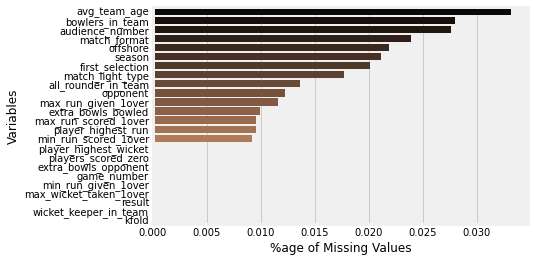

In [13]:
"""Percentage of Missing Values"""
percentage = df_maindata.isnull().mean().round(5).to_frame().rename({0: '%age of Missing Values'}, axis = 1).sort_values(by = '%age of Missing Values', ascending = False)
display(percentage.style.background_gradient('copper_r'))

"""Setting for displaying plot"""
plot_percentage = percentage.reset_index().rename({"index": "Variables"}, axis = 1)
# order = percentage.isnull().mean().round(2).sort_values(ascending =False).index
ax = sns.barplot(plot_percentage['%age of Missing Values'], plot_percentage['Variables'], palette = 'copper')
plt.show()

Observations:
- Missing values in Avg_team_Age, Bowlers_in_team, Audience_number,Match_format ,Offshore, Season,First_selection, Match_light_type ,All_rounder_in_team, Opponent,Max_run_given_1over, Extra_bowls_bowled,player_highest_run,Max_run_scored_1over, Min_run_scored_1over Treat them accordingly
- Avg_team_Age has highest number of missing values.
- **Missing value in Opponent cannot be filled with mode as it might bias our result towards. Best option is to drop those rows**

In [14]:
missing_values_cols = list(plot_percentage[plot_percentage['%age of Missing Values'] != 0]['Variables']) 
missing_cat_cols = [col for col in missing_values_cols if df_maindata[col].dtype == 'object']
missing_num_cols = [col for col in missing_values_cols if col not in missing_cat_cols]
missing_cat_cols

['match_format',
 'offshore',
 'season',
 'first_selection',
 'match_light_type',
 'opponent']

In [15]:
"""Drop rows with missing values in Opponent"""
df_maindata.dropna(subset=['opponent'], inplace = True)

# Now removing Opponent col from list of categorical colummns
missing_cat_cols.remove('opponent')                     

"""Impute Mode for categorical columns"""
for col in missing_cat_cols:
    df_maindata[col].fillna(value=df_maindata[col].mode()[0],inplace=True)

"""Impute mean for numerical columns"""
for col in missing_num_cols:
    df_maindata[col].fillna(value=df_maindata[col].median(),inplace=True)

In [16]:
df_maindata.isnull().sum().to_frame().rename({0: 'Missing Values'}, axis = 1).sort_values(by = 'Missing Values', ascending = False).style.background_gradient('copper_r')

,Missing Values
game_number,0
result,0
player_highest_wicket,0
players_scored_zero,0
player_highest_run,0
extra_bowls_opponent,0
max_run_given_1over,0
min_run_scored_1over,0
min_run_given_1over,0
extra_bowls_bowled,0


Observations:
- Dropped the rows with missing values in Opponent Col 
- Imputed categorical missing values using mode
- Imputed numerical missing values using mean

## **Duplicates?**

In [17]:
df_maindata.duplicated().sum()

0

## **Any Constant Features? They show same value or just one value for all the records in the dataset.**

In [18]:
# Checking constant variables
constant_features = [col for col in df_maindata.columns if df_maindata[col].nunique() == 1]
constant_features

['wicket_keeper_in_team']

In [19]:
# Dropping the constant feature
del df_maindata['wicket_keeper_in_team']

## **Correlation**

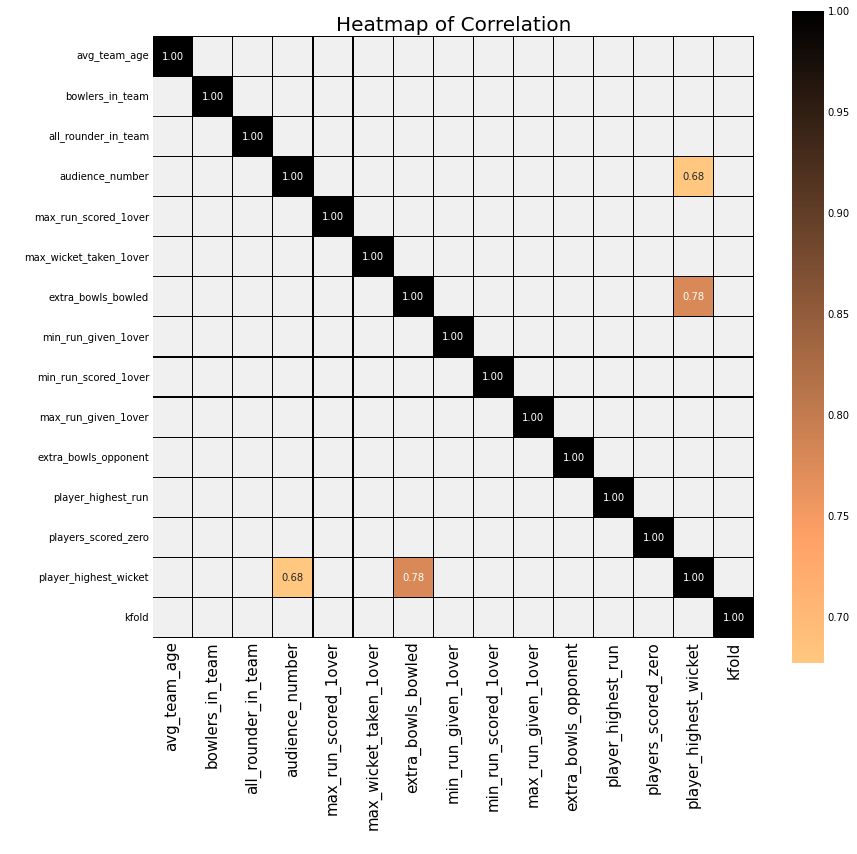

In [20]:
plt.figure(figsize=(12,12))
ax = sns.heatmap(df_maindata.corr(), annot = True, fmt='.2f', mask = df_maindata.corr() < .65, square = True, lw=0.2,linecolor='black' , cmap = 'copper_r')
plt.title("Heatmap of Correlation",fontsize = 20)
plt.xlabel(" ")
plt.ylabel(" ")
plt.xticks(fontsize = 15)
plt.show();

Observations:
- Wicket_keeper_in_team has only one value. Hence we can drop that variable
- No Multicollinearity at 0.65 as threshold.

## **Let's work with Cardinality**

In [21]:
for col in df_maindata.columns:
  print(col)
  print(f"First 5 Unique Values: {df_maindata[col].unique()[:5]}")
  print(f"Number of unique values: {df_maindata[col].nunique()}")

  print('\n')

game_number
First 5 Unique Values: ['Game_1' 'Game_2' 'Game_3' 'Game_4' 'Game_5']
Number of unique values: 2894


result
First 5 Unique Values: ['Loss' 'Win']
Number of unique values: 2


avg_team_age
First 5 Unique Values: [18. 24. 30. 17. 12.]
Number of unique values: 13


match_light_type
First 5 Unique Values: ['Day' 'Day and Night' 'Night']
Number of unique values: 3


match_format
First 5 Unique Values: ['ODI' 'T20' 'Test']
Number of unique values: 3


bowlers_in_team
First 5 Unique Values: [3. 2. 1. 4. 5.]
Number of unique values: 5


all_rounder_in_team
First 5 Unique Values: [3. 4. 2. 1.]
Number of unique values: 4


first_selection
First 5 Unique Values: ['Bowling' 'Batting']
Number of unique values: 2


opponent
First 5 Unique Values: ['Srilanka' 'Zimbabwe' 'Kenya' 'Australia' 'England']
Number of unique values: 9


season
First 5 Unique Values: ['Summer' 'Rainy' 'Winter']
Number of unique values: 3


audience_number
First 5 Unique Values: [ 9940.  8400. 13146.  7357. 13328.

### **Observation:**

---
- We can One Hot Encode variables with 3 unique values
- Drop audience_number as it doesn't contribute much towards the predictions.
- Factorize player_highest_run as the values are bigger than the other variables


In [22]:
useful_cols = [col for col in df_maindata.columns if col not in ['game_number', 'result', 'kfold']]
categorical = [col for col in useful_cols if df_maindata[col].dtype == 'object']
numerical = [col for col in useful_cols if col not in categorical]

In [23]:
ohe_list = []
for col in df_maindata[useful_cols].columns:
  if df_maindata[useful_cols][col].nunique() <= 3:
    ohe_list.append(col) 

ohe_list

['match_light_type', 'match_format', 'first_selection', 'season', 'offshore']

In [24]:
for col in ohe_list:
  dummies = pd.get_dummies(df_maindata[col], prefix=col, drop_first=True)
  df_maindata[dummies.columns] = dummies

In [25]:
df_maindata.drop(ohe_list, axis = 1, inplace=True )
df_maindata.drop('game_number', axis = 1, inplace=True)

In [26]:
df_maindata['result'] = df_maindata['result'].apply(lambda x: 1 if x == 'Win' else 0)

In [27]:
useful_cols = [col for col in df_maindata.columns if col not in ['game_number','audience_number', 'result' ,'kfold']]
categorical = [col for col in useful_cols if df_maindata[col].dtype == 'object']
numerical = [col for col in useful_cols if col not in categorical]

In [28]:
df_maindata.iloc[df_maindata['audience_number'].idxmax()]


result                                      1
avg_team_age                               30
bowlers_in_team                             4
all_rounder_in_team                         3
opponent                           Bangladesh
audience_number                   1.39993e+06
max_run_scored_1over                       14
max_wicket_taken_1over                      1
extra_bowls_bowled                         34
min_run_given_1over                         5
min_run_scored_1over                        3
max_run_given_1over                        33
extra_bowls_opponent                       18
player_highest_run                         65
players_scored_zero                         2
player_highest_wicket                       5
kfold                                       1
match_light_type_Day and Night              0
match_light_type_Night                      0
match_format_T20                            0
match_format_Test                           0
first_selection_Bowling           

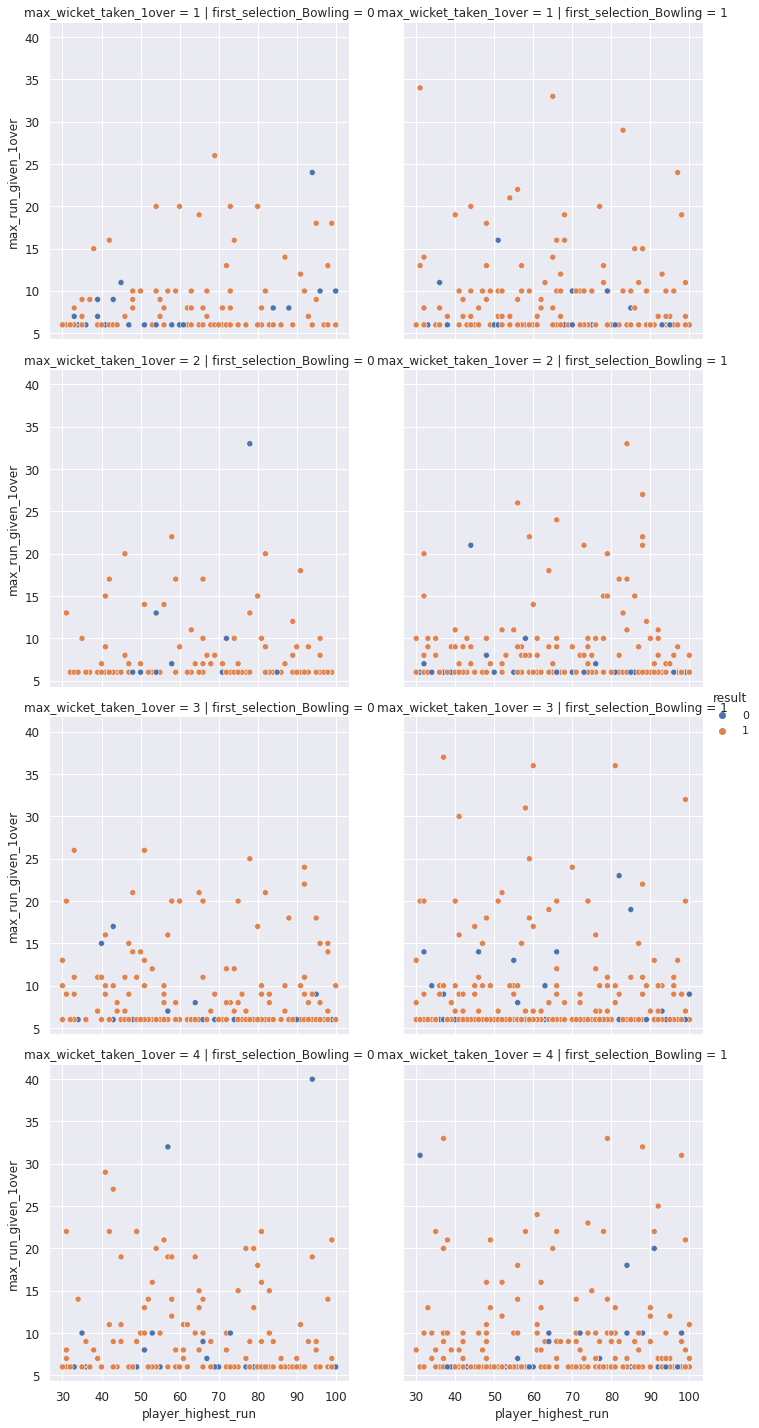

In [29]:


sns.set(rc={'xtick.labelsize':12,'ytick.labelsize':12,'axes.labelsize':12})
sns.relplot(x="player_highest_run", y="max_run_given_1over",col="first_selection_Bowling", row="max_wicket_taken_1over", hue='result',  data=df_maindata)
plt.show()

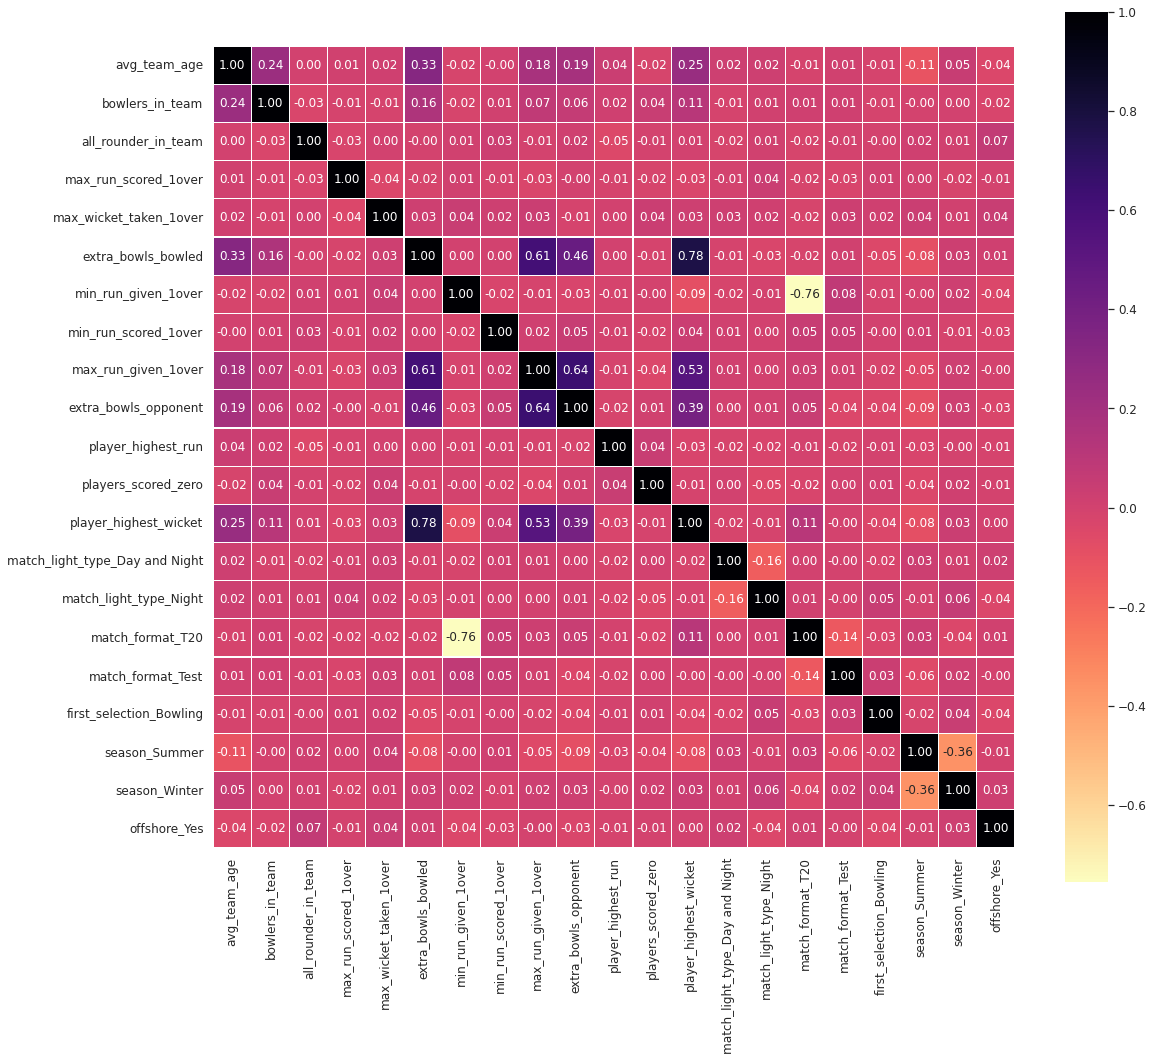

In [30]:
plt.figure(figsize = (16,16))
sns.heatmap(df_maindata[useful_cols].corr(), annot = True, fmt = '.2f', lw = 0.2, cmap = 'magma_r', square = True)

In [31]:
for col in df_maindata.columns:
  print(col)
  print(f"First 5 Unique Values: {df_maindata[col].unique()[:5]}")
  print(f"Number of unique values: {df_maindata[col].nunique()}")

  print('\n')

result
First 5 Unique Values: [0 1]
Number of unique values: 2


avg_team_age
First 5 Unique Values: [18. 24. 30. 17. 12.]
Number of unique values: 13


bowlers_in_team
First 5 Unique Values: [3. 2. 1. 4. 5.]
Number of unique values: 5


all_rounder_in_team
First 5 Unique Values: [3. 4. 2. 1.]
Number of unique values: 4


opponent
First 5 Unique Values: ['Srilanka' 'Zimbabwe' 'Kenya' 'Australia' 'England']
Number of unique values: 9


audience_number
First 5 Unique Values: [ 9940.  8400. 13146.  7357. 13328.]
Number of unique values: 1346


max_run_scored_1over
First 5 Unique Values: [13. 12. 14. 15. 16.]
Number of unique values: 15


max_wicket_taken_1over
First 5 Unique Values: [3 1 4 2]
Number of unique values: 4


extra_bowls_bowled
First 5 Unique Values: [0. 1. 2. 3. 4.]
Number of unique values: 40


min_run_given_1over
First 5 Unique Values: [2 0 5 4 3]
Number of unique values: 7


min_run_scored_1over
First 5 Unique Values: [3. 4. 1. 2.]
Number of unique values: 4


max_run_give

In [32]:
df, df_test1 = train_test_split(df_maindata, stratify=df_maindata['result'], test_size = 0.15, random_state = 7)

In [ ]:
!pip install optuna

In [35]:
import optuna

In [37]:
def run(trial):

    for fold in range(5):
        xtrain =  df_maindata[df_maindata.kfold != fold].reset_index(drop=True)
        xvalid = df_maindata[df_maindata.kfold == fold].reset_index(drop=True)

        ytrain = xtrain.result
        yvalid = xvalid.result
        
        xtrain = xtrain[useful_cols]
        xvalid = xvalid[useful_cols]
        
        ordinal_encoder = preprocessing.OrdinalEncoder()
        xtrain[categorical] = ordinal_encoder.fit_transform(xtrain[categorical])
        xvalid[categorical] = ordinal_encoder.transform(xvalid[categorical])
        
        # Optuna suggest params
        params = {
        'n_estimators': trial.suggest_int('n_estimators', 5000, 7000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.10),
        'subsample': trial.suggest_uniform('subsample', 0.50, 0.90),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.50, 0.90),
        'gamma': trial.suggest_int('gamma', 0, 20)}
        
        model_xgb = XGBClassifier(**params, random_state=7)
        
        
        model_xgb.fit(xtrain, ytrain, early_stopping_rounds=300,eval_set=[(xvalid, yvalid)],  verbose=500)
        
        preds_valid = model.predict_proba(xvalid)[:, 1]
        roc_auc = metrics.roc_auc_score(yvalid, preds_valid)
    
        
    return roc_auc


study = optuna.create_study(direction="maximize")
study.optimize(run, n_trials=10)

study.best_params

[I 2021-10-28 12:29:41,624] A new study created in memory with name: no-name-05c06d78-244c-4469-b9ba-7a8b158503ae
[W 2021-10-28 12:29:41,641] Trial 0 failed because of the following error: NameError("name 'XGBClassifier' is not defined")
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/optuna/study/_optimize.py", line 213, in _run_trial
    value_or_values = func(trial)
  File "<ipython-input-37-866ed7bb2402>", line 26, in run
    model_xgb = XGBClassifier(**params, random_state=7)
NameError: name 'XGBClassifier' is not defined


NameError: ignored

In [225]:

df_test = df_test1[useful_cols]
final_test_predictions = []
final_valid_predictions = {}
decisions_valid = []
decisions_test = [] 
scores = []
for fold in range(5):
    xtrain =  df_maindata[df_maindata.kfold != fold].reset_index(drop=True)
    xvalid = df_maindata[df_maindata.kfold == fold].reset_index(drop=True)
    xtest = df_test.copy()
    
    valid_ids = xvalid.index.values.tolist()

    ytrain = xtrain.result
    yvalid = xvalid.result
    
    xtrain = xtrain[useful_cols]
    xvalid = xvalid[useful_cols]
    
    ordinal_encoder = preprocessing.OrdinalEncoder()
    xtrain[categorical] = ordinal_encoder.fit_transform(xtrain[categorical])
    xvalid[categorical] = ordinal_encoder.transform(xvalid[categorical])
    xtest[categorical] = ordinal_encoder.transform(xtest[categorical])
    

    params = study.best_params
    
    model = XGBClassifier(**params,
        random_state=7
    )
    model.fit(xtrain, ytrain, early_stopping_rounds=300, eval_set=[(xvalid, yvalid)], verbose=500)
    preds_valid = model.predict_proba(xvalid)[:, 1]
    # decision_valid = (preds_valid >= 0.5)
    # decisions_valid.append(decision_valid)
    test_preds = model.predict_proba(xtest)[:, 1]
    # decision_test = (test_preds >= 0.5)
    decisions_test.append(decision_test)
    # final_test_predictions.append(test_preds)
    final_valid_predictions.update(dict(zip(valid_ids, preds_valid)))
    roc_auc = metrics.roc_auc_score(yvalid, preds_valid)
    print(fold, roc_auc)
    scores.append(roc_auc)
 
print(np.mean(scores), np.std(scores))

[0]	validation_0-error:0.17474
Will train until validation_0-error hasn't improved in 300 rounds.
[500]	validation_0-error:0.1609
Stopping. Best iteration:
[283]	validation_0-error:0.15917

0 0.8117595748133724
[0]	validation_0-error:0.139655
Will train until validation_0-error hasn't improved in 300 rounds.
Stopping. Best iteration:
[1]	validation_0-error:0.132759

1 0.7539201710620099
[0]	validation_0-error:0.154905
Will train until validation_0-error hasn't improved in 300 rounds.
Stopping. Best iteration:
[0]	validation_0-error:0.154905

2 0.7067039691521019
[0]	validation_0-error:0.15544
Will train until validation_0-error hasn't improved in 300 rounds.
[500]	validation_0-error:0.119171
Stopping. Best iteration:
[547]	validation_0-error:0.11399

3 0.8328450350528409
[0]	validation_0-error:0.154514
Will train until validation_0-error hasn't improved in 300 rounds.
Stopping. Best iteration:
[125]	validation_0-error:0.144097

4 0.7751280127129867
0.7760713525586623 0.0442725622571954

In [57]:
from sklearn.metrics import confusion_matrix, classification_report
df_test[categorical] = ordinal_encoder.transform(df_test[categorical])
print(confusion_matrix(df_test1.result, model.predict(df_test)))
print(classification_report(df_test1.result, model.predict(df_test)))

[[ 52  18]
 [  5 360]]
              precision    recall  f1-score   support

           0       0.91      0.74      0.82        70
           1       0.95      0.99      0.97       365

    accuracy                           0.95       435
   macro avg       0.93      0.86      0.89       435
weighted avg       0.95      0.95      0.94       435



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


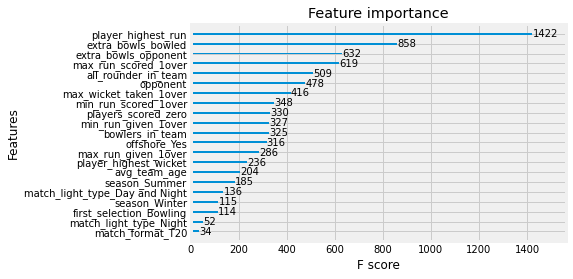

In [60]:
import xgboost as xgb
model.get_booster().feature_names = list(useful_cols)
xgb.plot_importance(model.get_booster())

In [179]:
from sklearn.ensemble import  RandomForestClassifier

In [ ]:
def run(trial):

    for fold in range(5):
        xtrain =  df_maindata[df_maindata.kfold != fold].reset_index(drop=True)
        xvalid = df_maindata[df_maindata.kfold == fold].reset_index(drop=True)

        ytrain = xtrain.result
        yvalid = xvalid.result
        
        xtrain = xtrain[useful_cols]
        xvalid = xvalid[useful_cols]
        
        ordinal_encoder = preprocessing.OrdinalEncoder()
        xtrain[categorical] = ordinal_encoder.fit_transform(xtrain[categorical])
        xvalid[categorical] = ordinal_encoder.transform(xvalid[categorical])
        
        # Optuna suggest params
        params = {
        n_estimators = trial.suggest_int("rf_n_estimators", 10, 1000)
        max_depth = trial.suggest_int("rf_max_depth", 2, 32, log=True)}
        
        model_xgb = RandomForestClassifier(**params, random_state=7)
        
        
        model_xgb.fit(xtrain, ytrain, early_stopping_rounds=300,eval_set=[(xvalid, yvalid)],  verbose=500)
        
        preds_valid = model.predict_proba(xvalid)[:, 1]
        roc_auc = metrics.roc_auc_score(yvalid, preds_valid)
    
        
    return roc_auc


study = optuna.create_study(direction="maximize")
study.optimize(run, n_trials=10)

study.best_params

In [212]:

df_test = df_test1[useful_cols]
final_test_predictions = []
final_valid_predictions = {}
decisions_valid = []
decisions_test = [] 
scores = []
for fold in range(5):
    xtrain =  df[df.kfold != fold].reset_index(drop=True)
    xvalid = df[df.kfold == fold].reset_index(drop=True)
    xtest = df_test.copy()
    
    valid_ids = xvalid.index.values.tolist()

    ytrain = xtrain.result
    yvalid = xvalid.result
    
    xtrain = xtrain[useful_cols]
    xvalid = xvalid[useful_cols]
    
    ordinal_encoder = preprocessing.OrdinalEncoder()
    xtrain[categorical] = ordinal_encoder.fit_transform(xtrain[categorical])
    xvalid[categorical] = ordinal_encoder.transform(xvalid[categorical])
    xtest[categorical] = ordinal_encoder.transform(xtest[categorical])
    
    model = RandomForestClassifier(
        random_state=0, 
        n_estimators=5000
    )
    model.fit(xtrain, ytrain)
    preds_valid = model.predict_proba(xvalid)[:, 1]
    # decision_valid = (preds_valid >= 0.5)
    # decisions_valid.append(decision_valid)
    test_preds = model.predict_proba(xtest)[:, 1]
    # decision_test = (test_preds >= 0.5)
    decisions_test.append(decision_test)
    # final_test_predictions.append(test_preds)
    final_valid_predictions.update(dict(zip(valid_ids, preds_valid)))
    roc_auc = metrics.roc_auc_score(yvalid, preds_valid)
    print(fold, roc_auc)
    scores.append(roc_auc)
 
print(np.mean(scores), np.std(scores))

0 0.9407665505226481
1 0.967382835910344
2 0.9558291770573566
3 0.9787893408551068
4 0.9498191681735986
0.9585174145038108 0.013323107569745845


<Figure size 1296x864 with 0 Axes>

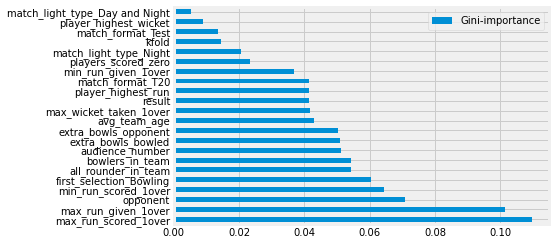

In [218]:
import pandas as pd
%matplotlib inline
plt.figure(figsize = (18,12))
#do code to support model
#"data" is the X dataframe and model is the SKlearn object

feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(df_maindata.columns, model.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
(importances.sort_values(by='Gini-importance', ascending = False)).plot(kind='barh')

In [ ]:
!pip install catboost

In [209]:
from catboost import CatBoostClassifier
df_test = df_test1[useful_cols]
final_test_predictions = []
final_valid_predictions = {}
decisions_valid = []
decisions_test = [] 
scores = []
for fold in range(5):
    xtrain =  df[df.kfold != fold].reset_index(drop=True)
    xvalid = df[df.kfold == fold].reset_index(drop=True)
    xtest = df_test.copy()
    
    valid_ids = xvalid.index.values.tolist()

    ytrain = xtrain.result
    yvalid = xvalid.result
    
    xtrain = xtrain[useful_cols]
    xvalid = xvalid[useful_cols]
    
    ordinal_encoder = preprocessing.OrdinalEncoder()
    xtrain[categorical] = ordinal_encoder.fit_transform(xtrain[categorical])
    xvalid[categorical] = ordinal_encoder.transform(xvalid[categorical])
    xtest[categorical] = ordinal_encoder.transform(xtest[categorical])
    
    model = CatBoostClassifier(loss_function = 'Logloss', eval_metric='AUC')
    model.fit(xtrain, ytrain,  eval_set=[(xvalid, yvalid)], verbose=500, plot = True)
    preds_valid = model.predict_proba(xvalid)[:, 1]
    # decision_valid = (preds_valid >= 0.5)
    # decisions_valid.append(decision_valid)
    test_preds = model.predict_proba(xtest)[:, 1]
    # decision_test = (test_preds >= 0.5)
    decisions_test.append(decision_test)
    # final_test_predictions.append(test_preds)
    final_valid_predictions.update(dict(zip(valid_ids, preds_valid)))
    roc_auc = metrics.roc_auc_score(yvalid, preds_valid)
    print(fold, roc_auc)
    scores.append(roc_auc)
 
print(np.mean(scores), np.std(scores))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.03741
0:	test: 0.6788529	best: 0.6788529 (0)	total: 2.37ms	remaining: 2.37s
500:	test: 0.9216564	best: 0.9229161 (364)	total: 701ms	remaining: 698ms
999:	test: 0.9183061	best: 0.9229161 (364)	total: 1.43s	remaining: 0us

bestTest = 0.9229161083
bestIteration = 364

Shrink model to first 365 iterations.
0 0.922916108281962


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.037448
0:	test: 0.6447920	best: 0.6447920 (0)	total: 1.55ms	remaining: 1.55s
500:	test: 0.9412382	best: 0.9419573 (347)	total: 695ms	remaining: 692ms
999:	test: 0.9436653	best: 0.9442647 (698)	total: 1.45s	remaining: 0us

bestTest = 0.944264653
bestIteration = 698

Shrink model to first 699 iterations.
1 0.944264653002517


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.037504
0:	test: 0.6208697	best: 0.6208697 (0)	total: 1.75ms	remaining: 1.75s
500:	test: 0.9180175	best: 0.9180175 (500)	total: 699ms	remaining: 697ms
999:	test: 0.9187656	best: 0.9221633 (742)	total: 1.45s	remaining: 0us

bestTest = 0.9221633416
bestIteration = 742

Shrink model to first 743 iterations.
2 0.9221633416458852


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.037485
0:	test: 0.6156844	best: 0.6156844 (0)	total: 2.96ms	remaining: 2.95s
500:	test: 0.9428815	best: 0.9428815 (500)	total: 695ms	remaining: 693ms
999:	test: 0.9442548	best: 0.9447372 (935)	total: 1.44s	remaining: 0us

bestTest = 0.9447372328
bestIteration = 935

Shrink model to first 936 iterations.
3 0.9447372327790974


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.037419
0:	test: 0.6465943	best: 0.6465943 (0)	total: 3.47ms	remaining: 3.47s
500:	test: 0.9123870	best: 0.9129596 (492)	total: 690ms	remaining: 688ms
999:	test: 0.9181736	best: 0.9199216 (721)	total: 1.42s	remaining: 0us

bestTest = 0.9199216395
bestIteration = 721

Shrink model to first 722 iterations.
4 0.9199216395418928
0.9308005950502709 0.011230580382602438


In [210]:
print(model.get_best_score())

{'learn': {'Logloss': 0.022782111654476245}, 'validation': {'Logloss': 0.18058196058023812, 'AUC': 0.9199216395418927}}
